# Première Etape, importer les packages que nous utiliserons

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensuite, on commence par importer les données

In [13]:
train=pd.read_csv('trainTitanic.csv')
test=pd.read_csv('testTitanic.csv')
gender=pd.read_csv('gender_submissionTitanic.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## On fusionne les sources pour creer un dataset de test  cohérent, càd avec la variable survived, que l'on extrain de notre fichier, gender_submission

In [14]:
test = test.merge(gender, left_on='PassengerId', right_on='PassengerId')


In [15]:
test

## On voit que cela nous permet bien d'ajouter notre variable d'intérêt; ie, survived à notre BDD test, 
## où elle n'était pas présente

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


# On va maintenant s'intéresser à notre dataset de 'training', et à son 'nettoyage'

### On commence par regarder globalement la disposition de nos données

In [16]:
train.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
train.tail(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
# On remarque que la variable survived est bien présente cette fois-ci. Ce qui nous arrange bien car dans le 
# fichier GenderSubmission elle n'était présente qu'à partir de l'observation 892, donc pas pour notre 'train dataset'.
# Et on a donc bien évidement pas à reproduire l'étape faite précedemment pour notre 'test dataset'

In [18]:
# On commence par mettre le PassengerId en index pour plus de clareté

train = train.set_index("PassengerId")

In [19]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [20]:
# On s'intéresse ensuite à la présence de données manquantes 

train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [21]:
# On voit alors que seules trois variables ont des données manquantes : Cabine, Age & Embarked
## Pour cabine cela représente plus de 77% de nos données, on ne peut clairement pas la garder. 
## D'autant plus que sans une analyse poussée sur la localisation des cabines et donc par exemple leur possible acccès 
## plus rapide au  pont et aux canaux de sauvetage, cette variable ne semble pas très pertinente, ce qui est notre cas.
## On ne va donc pas supprimé près de 80% de nos observations (seule solution dans le cas d'une variable catégorique unique), 
## pour cette variable
## On supprime donc cette variable 'Cabine'

train.drop('Cabin', axis = 1, inplace=True)

In [22]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


In [6]:
### La variable Age semble quant à elle bien plus importante. On imagine facilement que l'âge impact les chances de survies
### En outre, ses données manquantes représentent moins de 20% de nos données, mais cela reste tout de même considérable
### Plutot que de supprimé 20% de nos observations, on choisit de remplacer les valeurs manquantes de notres variable 'Age'
### par la moyenne que prend cette variable parmis nos observations.*


###### on pourra aussi faire un modèle avec le remplacmeent par la moyenne et un modèle ne supprimant les données

train['Age'].mean()

29.69911764705882

In [23]:
train['Age'].fillna(29.7, inplace=True)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,S


In [24]:
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [25]:
#### Il nous reste encore deux valeurs manquantes pour la variable 'Embarked'
#### On fait face au même problème que pour "Cabin", c'est un variable 'catégorique'. 
#### On commence par regarder quelles sont les observations pour lesquelles ces valeurs sont manquantes, 
#### avec du boolean indexing

train[train['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [26]:
#### On peut penser à créer une variable pour chaque lieux d'embarquement pour ensuite remplacer ces NaN par la moyenne
#### On commence par regarder les valeurs prises par Embarked, et le nombre d'observations associées

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
#### On pourrait alors rapidement dédurie que S serait la valeur par laquelle rempalcer nos NaN, mais si on souhaite utiliser 
#### cette variable dans notre analyse il nous faudra la transformer en valeur numérique de toute façon ce que l'on fait alors.

train['Embarked'].astype('category')

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: category
Categories (3, object): ['C', 'Q', 'S']

In [28]:
## Cette fonction permet de laisser au programme le travail de déterminer le nombre de classe et de leur associer automatiquement
## une catégorie.
### Cela se base sur le principe que toutes nos différentes catégories sont regroupées sous le même 'nom', la même écriture
### On vérifie cela en voyant que l'on a bien l'ensemble de nos observations qui sont considérées ici

train ['Embarked'] = train['Embarked'].astype('category').cat.codes
train['Embarked'].value_counts()

 2    644
 0    168
 1     77
-1      2
Name: Embarked, dtype: int64

<AxesSubplot:>

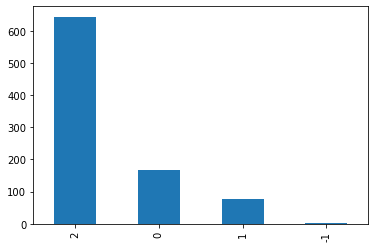

In [29]:
# On peut se représenter ça graphiquement pour plus de clareté 

train['Embarked'].value_counts().plot.bar()

In [30]:
# On voit qu'il y a bien entendu toujours nos deux Na, représentées par les valeurs -1
# Pour déterminer la moyenne et donc savoir par quoi les remplacer, on fait la moyenne sans les considerer

train['Embarked'][train['Embarked'].notna()].mean()

1.5297418630751964

In [31]:
# On peut alors voir de façon analytique, (même si on le savait déjà), que l'on peut replacer nos NaN par la valeur 2

train['Embarked'] = train['Embarked'].replace([-1],[2])

In [32]:
train['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [34]:
# Maintenant qu'on l'on s'est occupé de nos valeurs manquantes, on peut réfléchir à quelle autres variables on souhaiterait
# garder ou non.
# Tout d'abord, la variable ticket représentant le numéro de ticket semble inutile. D'autant que la classe du ticket est 
# enregistrée dans une autre variable 'pclass', et le prix dans la variable 'Passenger Fare'.
# A moins que ce numéro ne donne une indication particulière sur la personne l'ayant achetée, ce qui ne semble pas être le cas
# ici, on peut l'enlever de notre dataset.

train.drop('Ticket', axis = 1, inplace=True)

KeyError: "['Ticket'] not found in axis"

In [35]:
train
# Les variable 'parch' & 'sibsp' semblent elles donner une indication sur le taux de survie.
# On peut en effet penser que dans une situation pareil, être égoiste et simplement chercher à sauver sa vie ou bien chercher
# à attendre tous les membre de sa famille avant de monter dans un caneau n'entraîne pas les même chances de survie
# On vérifie cette hypothèse par l'analyse suivante 


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,2
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,23.4500,2


In [36]:
# On commence par créer une nouvelle variable 'Famille', équivalent au nombre de membre de la même famille présent 
# sur le Titanic pour chaque individus, inclus lui-même

train['FamilleT']=train['SibSp']+train['Parch'] + 1

In [37]:
# On le représente de facon plus explicite en par regroupant notre dataset d'après cette nouvelle variable 'Famille'

gr = train.groupby('FamilleT')
nb = gr.count()
nb

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
FamilleT,,,,,,,,,
1,537,537,537,537,537,537,537,537,537
2,161,161,161,161,161,161,161,161,161
3,102,102,102,102,102,102,102,102,102
4,29,29,29,29,29,29,29,29,29
5,15,15,15,15,15,15,15,15,15
6,22,22,22,22,22,22,22,22,22
7,12,12,12,12,12,12,12,12,12
8,6,6,6,6,6,6,6,6,6
11,7,7,7,7,7,7,7,7,7


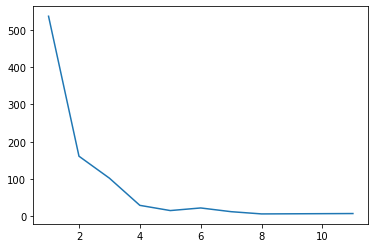

In [38]:
# La corrélation négative apparaît alors clairement.
# On la représente grapphiquement plus plus de clareté 

plt.plot(nb['Survived'])

In [39]:
# Il semble donc judicieux de garder nos deux variable 'Sibs' & 'Parch'
# On peut alors enlever notre variable créer simplement pour notre analyse 

train.drop('FamilleT', axis = 1, inplace = True)

In [40]:
# La variable 'Name' ne semble pas apporter la moindre information

train.drop('Name', axis = 1, inplace = True)

In [41]:
# Toutes nos variable restantes semblent alors pertinentes pour notre analyse
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,2
2,1,1,female,38.0,1,0,71.2833,0
3,1,3,female,26.0,0,0,7.9250,2
4,1,1,female,35.0,1,0,53.1000,2
5,0,3,male,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,2
888,1,1,female,19.0,0,0,30.0000,2
889,0,3,female,29.7,1,2,23.4500,2


In [42]:
# Afin de pouvoir opérer des opération de machine learning, il nous reste néanmoins à transformer notre variable 'Sex' en 
# variable numérique, comme nous l'avons fait pour la variable 'Embarked'
## Pour convertir nos catégories en données numérique nous allons utiliser cette fois la fonction map

train['Sex']=train['Sex'].map({'male':0, 'female':1})

In [43]:
# On obtient alors finalement la base de données 'nettoyée' sur laquelle nus alons pouvoir implémenter nos modèles de 
# machine learning

train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2
2,1,1,1,38.0,1,0,71.2833,0
3,1,3,1,26.0,0,0,7.9250,2
4,1,1,1,35.0,1,0,53.1000,2
5,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,2
888,1,1,1,19.0,0,0,30.0000,2
889,0,3,1,29.7,1,2,23.4500,2


In [252]:
# On passe maintenant à l'analyse statistiques descriptives de nos variables considérées.

train['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [253]:
train['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [254]:
train['Sex'].describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [255]:
train['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [257]:
train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [258]:
train['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [259]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [325]:
train['Embarked'].describe()

count    891.000000
mean       1.536476
std        0.791503
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Embarked, dtype: float64

In [330]:
# On finit notre analyse statistique descriptive en visualisation la corréaltion entre nos différentes variables.

train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,-0.108262
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,-0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


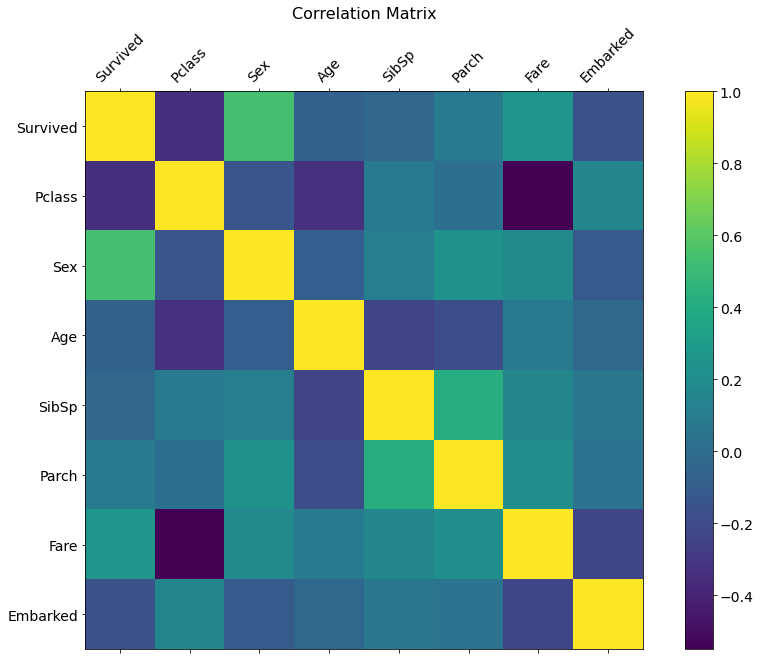

In [44]:
f = plt.figure(figsize=(15, 10))
plt.matshow(train.corr(), fignum=f.number)
plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=45)
plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [76]:
# On export finalement notre base de données sous CSV 



# On réalise les mêmes opération sur la base de donnéet Test

In [45]:
## Rajouter qu'on a du drop NaN Fare
test = test.set_index("PassengerId")
test.drop('Cabin', axis = 1, inplace=True)
test['Age'].fillna(29.7, inplace=True)
test ['Embarked'] = test['Embarked'].astype('category').cat.codes
test['Embarked'] = test['Embarked'].replace([-1],[2])
test.drop('Name', axis = 1, inplace=True)
test.drop('Ticket', axis = 1, inplace=True)
test['Sex']=test['Sex'].map({'male':0, 'female':1})


### Une différence avec la BDD précédente est ici la présence d'un NA pour la variable Fare

In [46]:
test['Fare'].fillna(35.6, inplace=True)

# On finit notre travail en exportant nos 'nettoyées' BDD sous csv pour pouvoir ensuite leur appliquer nos modèles de machine learning

In [47]:
test.to_csv('BDD Test.csv', sep=';')
train.to_csv('BDD Clean.csv', sep=';')